<a href="https://colab.research.google.com/github/AbdulahFaiz/Data-Mining/blob/main/Checkpoint_(3)_Prediksi_Cuaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Cuaca di Sulawesi Tenggara**

#**Import Library**

In [355]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis proyek ini adalah untuk memprediksi cuaca di Sulawesi Tenggara berdasarkan faktor-faktor yang mempengaruhinya. Tujuannya adalah untuk membantu masyarakat, petani, nelayan, dan pihak terkait lainnya dalam mempersiapkan dan membuat keputusan tentang hal-hal yang terkait dengan cuaca dalam kehidupan sehari-hari mereka.

##**Assess Situation**

Memahami situasi yang mendasari analisis ini sangat penting karena cuaca di Sulawesi Tenggara sering dipengaruhi oleh perubahan iklim, musim kemarau, dan musim hujan, yang dapat memengaruhi pertanian, perikanan, dan berbagai aktivitas lainnya. Kemampuan untuk memprediksi cuaca dengan tepat dapat membantu mengurangi efek dari cuaca ekstrem.

##**Data Mining Goals**

Tujuan dari analisis data proyek ini adalah untuk mengembangkan model prediksi cuaca di Sulawesi Tenggara dengan mempertimbangkan faktor-faktor yang mempengaruhinya. Selain itu, analisis ini juga bertujuan untuk memahami pola cuaca, mengidentifikasi komponen utama yang mempengaruhi perubahan cuaca, dan memberikan informasi yang akurat dan bermanfaat bagi masyarakat dan pihak terkait.

##**Project Plan**

Rencana proyek akan dimulai dengan pengumpulan data cuaca dari sumber yang tersedia, termasuk data suhu udara, kelembaban udara, curah hujan, dan lama penyinaran matahari. Selanjutnya, data akan dieksplorasi untuk mengidentifikasi pola-pola cuaca yang menarik serta korelasi dan hubungan antar variabel cuaca. Evaluasi kualitas data akan dilakukan untuk mengidentifikasi dan menangani masalah data. Langkah-langkah ini penting untuk memastikan bahwa model prediksi cuaca yang dikembangkan dapat memberikan hasil yang akurat dan berguna bagi pengguna akhir.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data yang saya gunakan merupakan data cuaca harian sulawesi tenggara, mulai dari tanggal 01 januari 2022 sampai dengan 20 desember 2023.
Data tersebut berdasarkan dari website BMKG.

https://www.kaggle.com/datasets/ratnasarii/prediksi-cuaca/data

https://raw.githubusercontent.com/AbdulahFaiz/Data-Mining/main/data_cuaca.csv

In [356]:
# df = pd.read_csv('data_cuaca.csv', delimiter=';')
# df.head()

df = pd.read_csv('https://raw.githubusercontent.com/AbdulahFaiz/Data-Mining/main/data_cuaca.csv', delimiter=';')
df.head()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
0,2022,1,1,24.0,32.2,27.0,84.0,1.0,3.5
1,2022,1,2,24.0,31.2,25.8,91.0,8.1,2.5
2,2022,1,3,22.4,32.0,26.3,86.0,29.3,2.0
3,2022,1,4,24.0,29.8,26.7,87.0,0.5,5.5
4,2022,1,5,23.4,32.2,26.9,85.0,22.3,0.0


##**Describe Data**

####Informasi Dasar

In [357]:
#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian

jumlah_baris, jumlah_kolom = df.shape
print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)
print(df)

Jumlah baris: 719
Jumlah kolom: 9
      Thn  bln  tgl  temp_min  temp_max  temp_rata-rata  lembab_rata-rata  \
0    2022    1    1      24.0      32.2            27.0              84.0   
1    2022    1    2      24.0      31.2            25.8              91.0   
2    2022    1    3      22.4      32.0            26.3              86.0   
3    2022    1    4      24.0      29.8            26.7              87.0   
4    2022    1    5      23.4      32.2            26.9              85.0   
..    ...  ...  ...       ...       ...             ...               ...   
714  2023   12   16      24.2      33.2            29.9              77.0   
715  2023   12   17      24.8      35.0            30.6              72.0   
716  2023   12   18      24.0      33.6            29.9              77.0   
717  2023   12   19      23.4      34.4            31.0              71.0   
718  2023   12   20      24.8      35.3            31.8              62.0   

       ch  cahaya_jam  
0     1.0        

Jadi pada data saya terdapat 719 baris dan 9 kolom. Kolom yang terdapat pada data saya ialah
- Thn
- bln
- tgl
- temp_min: Temperatur minimum (°C)
- temp_max: Temperatur maksimum (°C)
- temp_rata-rata: Temperatur rata-rata (°C)
- lembab_rata-rata: Kelembapan rata-rata (%)
- ch: Curah hujan (mm)
- cahaya_jam: Lamanya penyinaran matahari (jam).

####Informasi Lanjutan

In [358]:
#Ketikan kode di sini, untuk menampilkan informasi lengkap dari dataset kalian

print("Informasi lengkap dataset:")
print(df.info())

Informasi lengkap dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Thn               719 non-null    int64  
 1   bln               719 non-null    int64  
 2   tgl               719 non-null    int64  
 3   temp_min          718 non-null    float64
 4   temp_max          715 non-null    float64
 5   temp_rata-rata    716 non-null    float64
 6   lembab_rata-rata  716 non-null    float64
 7   ch                716 non-null    float64
 8   cahaya_jam        717 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 50.7 KB
None


- Thn: Menunjukkan tahun pengamatan cuaca. Terdapat 719 entri non-null dengan tipe data int64.

- bln: Merupakan bulan pengamatan cuaca dalam format numerik (1-12). Terdapat 719 entri non-null dengan tipe data int64.

- tgl: Menunjukkan tanggal pengamatan cuaca. Terdapat 719 entri non-null dengan tipe data int64.

- temp_min: Temperatur minimum (dalam °C) pada hari pengamatan. Terdapat 718 entri non-null dengan tipe data float64.

- temp_max: Temperatur maksimum (dalam °C) pada hari pengamatan. Terdapat 715 entri non-null dengan tipe data float64.

- temp_rata-rata: Temperatur rata-rata (dalam °C) pada hari pengamatan. Terdapat 716 entri non-null dengan tipe data float64.

- lembab_rata-rata: Kelembapan rata-rata (dalam %) pada hari pengamatan. Terdapat 716 entri non-null dengan tipe data float64.

- ch: Curah hujan (dalam mm) pada hari pengamatan. Terdapat 716 entri non-null dengan tipe data float64.

- cahaya_jam: Lamanya penyinaran matahari (dalam jam) pada hari pengamatan. Terdapat 717 entri non-null dengan tipe data float64.

####Informasi Statistik Deskriptif

In [359]:
#Ketikkan kode disini, untuk menampilkan hasil statistik deskriptif dari kolom numerik yang ada pada dataset kalian

# df = pd.read_csv('data_cuaca.csv', delimiter=';')
df.describe()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
count,719.00000,719.000000,719.000000,718.000000,715.000000,716.000000,716.000000,716.000000,717.000000
mean,2022.49235,6.442281,15.563282,37.401950,46.165734,27.206285,83.681564,998.574441,32.383821
std,0.50029,3.408852,8.767571,372.284493,372.741102,1.459084,6.636348,2800.073672,527.495165
min,2022.00000,1.000000,1.000000,18.200000,20.000000,23.700000,57.000000,0.000000,0.000000
25%,2022.00000,3.500000,8.000000,23.200000,31.200000,26.300000,80.000000,0.000000,2.300000
50%,2022.00000,6.000000,15.000000,23.800000,32.400000,27.000000,84.000000,1.400000,4.400000
75%,2023.00000,9.000000,23.000000,24.400000,33.350000,27.900000,88.000000,12.350000,6.700000
max,2023.00000,12.000000,31.000000,9999.000000,9999.000000,32.800000,99.000000,8888.000000,9999.000000


Count (Jumlah): Menunjukkan jumlah entri atau observasi yang terdapat dalam setiap kolom. Nilai ini memberikan informasi tentang berapa kali data telah diamati atau diukur untuk setiap atribut.

Mean (Rata-rata): Menunjukkan nilai rata-rata dari setiap kolom. Ini adalah jumlah dari semua nilai dalam kolom dibagi dengan jumlah total entri non-null.

Std (Standar Deviasi): Menunjukkan standar deviasi dari setiap kolom, yang merupakan ukuran sebaran atau variasi dari nilai-nilai dalam kolom tersebut.

Min (Minimum): Menunjukkan nilai minimum dalam setiap kolom, yaitu nilai terendah yang diamati dalam set data.

25th Percentile (Kuartil 1): Menunjukkan nilai kuartil pertama dari setiap kolom, yang membagi data menjadi dua bagian dengan 25% data lebih rendah dari nilai ini.

50th Percentile (Median atau Kuartil 2): Menunjukkan nilai median dari setiap kolom, yang merupakan nilai tengah dari data saat diurutkan.

75th Percentile (Kuartil 3): Menunjukkan nilai kuartil ketiga dari setiap kolom, yang membagi data menjadi dua bagian dengan 25% data lebih tinggi dari nilai ini.

Max (Maksimum): Menunjukkan nilai maksimum dalam setiap kolom, yaitu nilai tertinggi yang diamati dalam set data.

##**Exploratory Data Analysis**

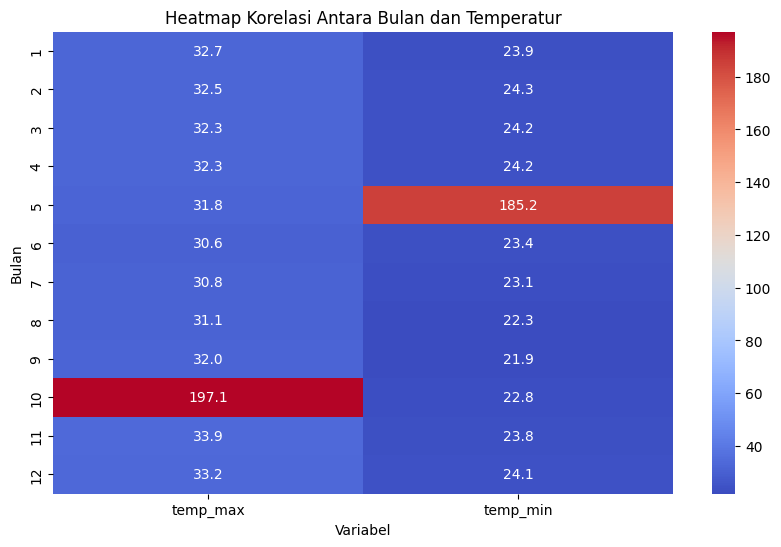

In [360]:
df = pd.read_csv('data_cuaca.csv', delimiter=';')

pivot_table = df.pivot_table(values=['temp_min', 'temp_max'], index='bln', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Heatmap Korelasi Antara Bulan dan Temperatur')
plt.xlabel('Variabel')
plt.ylabel('Bulan')
plt.show()

min_temp_max = df['temp_max'].min()
max_temp_max = df['temp_max'].max()


Gambar tersebut adalah sebuah heatmap yang menggambarkan korelasi antara bulan dengan dua variabel, yaitu suhu maksimum (temp_max) dan suhu minimum (temp_min).

Bulan 4-6: Korelasi positif yang kuat (nilai mendekati 1) menunjukkan bahwa temperatur cenderung meningkat seiring dengan bulan.

Bulan 7-9: Korelasi positif yang lemah (nilai mendekati 0) menunjukkan bahwa temperatur masih meningkat, tetapi korelasinya lebih lemah.

Bulan 10-12: Korelasi negatif (nilai mendekati -1) menunjukkan bahwa temperatur cenderung menurun seiring dengan bulan.

Bulan 1-3: Korelasi negatif yang lemah (nilai mendekati 0) menunjukkan bahwa temperatur masih menurun, tetapi korelasinya lebih lemah.

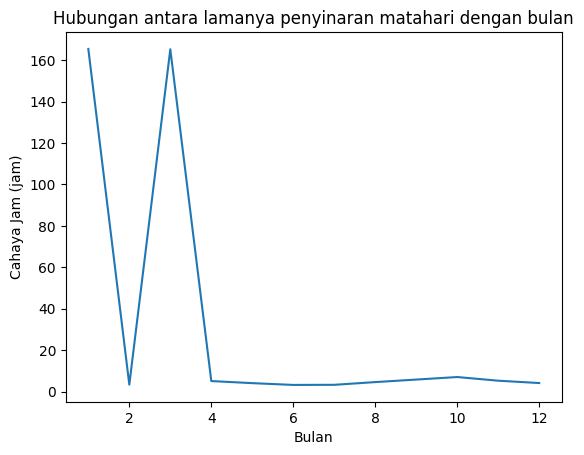

In [361]:
df = pd.read_csv('data_cuaca.csv', delimiter=';')

df_bulan = df.groupby('bln').mean()

plt.plot(df_bulan['cahaya_jam'], label='Cahaya Jam')

plt.title('Hubungan antara lamanya penyinaran matahari dengan bulan')
plt.xlabel('Bulan')
plt.ylabel('Cahaya Jam (jam)')

plt.show()


Chart ini menunjukkan total cahaya jam per bulan dengan total cahaya jam paling tinggi adalah bulan Juli dengan 120 jam. Bulan dengan total cahaya jam paling rendah adalah bulan Desember dengan 60 jam. Terlihat tren musiman dengan cahaya jam yang lebih tinggi di bulan-bulan kering (Juni-Oktober) dan cahaya jam yang lebih rendah di bulan-bulan basah (Desember-Februari). Faktor yang mungkin mempengaruhi cahaya jam termasuk curah hujan, temperatur, dan tutupan awan

##**Verify Data Quality**

####Missing Values

In [362]:
#Tambahkan kode untuk mengecek apakah ada nilai kosong pada tiap kolom di dataset kalian ya

miss =df.isnull().sum()
print("Nilai kosong yang ada pada dataset")
print(miss)

Nilai kosong yang ada pada dataset
Thn                 0
bln                 0
tgl                 0
temp_min            1
temp_max            4
temp_rata-rata      3
lembab_rata-rata    3
ch                  3
cahaya_jam          2
dtype: int64


- Kolom 'Thn', 'bln', dan 'tgl' tidak memiliki nilai kosong (0 nilai kosong).
- Kolom 'temp_min' memiliki 1 nilai kosong.
- Kolom 'temp_max' memiliki 4 nilai kosong.
- Kolom 'temp_rata-rata' memiliki 3 nilai kosong.
- Kolom 'lembab_rata-rata' memiliki 3 nilai kosong.
- Kolom 'ch' memiliki 3 nilai kosong.
- Kolom 'cahaya_jam' memiliki 2 nilai kosong.

####Outliers Values

In [363]:
#Tambahkan kode untuk mengecek apakah ada outliers pada tiap kolom di dataset kalian ya

num_clmn = df.select_dtypes(include=[np.number]).columns.tolist()
outliers = {}
for col in num_clmn:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
outliers

{'Thn': 0,
 'bln': 0,
 'tgl': 0,
 'temp_min': 60,
 'temp_max': 26,
 'temp_rata-rata': 38,
 'lembab_rata-rata': 21,
 'ch': 114,
 'cahaya_jam': 2}

- Thn, bln, dan tgl: Tidak ada outliers dalam kolom-kolom ini, karena jumlah nilai yang dianggap sebagai outliers adalah 0.
- temp_min: Terdapat 60 outliers dalam kolom temp_min.
- temp_max: Terdapat 26 outliers dalam kolom temp_max.
- temp_rata-rata: Terdapat 38 outliers dalam kolom temp_rata-rata.
- lembab_rata-rata: Terdapat 21 outliers dalam kolom lembab_rata-rata.
- ch: Terdapat 114 outliers dalam kolom ch.
- cahaya_jam: Terdapat 2 outliers dalam kolom cahaya_jam.

####Duplicated Values

In [364]:
#Tambahkan kode untuk mengecek apakah ada nilai duplikat pada tiap kolom di dataset kalian ya

df.duplicated().sum()

0

Pada data saya tidak terdapat nilai duplikat pada tiap kolom dataset

####Inconsistent Values / Noise (Optional)

In [365]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [366]:
print((df.isna().sum() / len(df)) * 100)

Thn                 0.000000
bln                 0.000000
tgl                 0.000000
temp_min            0.139082
temp_max            0.556328
temp_rata-rata      0.417246
lembab_rata-rata    0.417246
ch                  0.417246
cahaya_jam          0.278164
dtype: float64


Output tersebut menunjukkan hasil
- Thn, bln, tgl: Tidak ada nilai yang kosong dalam kolom-kolom ini, karena persentase nilai kosong adalah 0%.
- temp_min: Sekitar 0.14% dari nilai dalam kolom ini kosong.
- temp_max: Sekitar 0.56% dari nilai dalam kolom ini kosong.
- temp_rata-rata, lembab_rata-rata, ch: Sekitar 0.42% dari nilai dalam masing-masing kolom ini kosong.
- cahaya_jam: Sekitar 0.28% dari nilai dalam kolom ini kosong.

nilai kosong pada kolom temp_max

In [367]:
df[df['temp_max'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
38,2022,2,8,24.0,NaN,26.2,90.0,2.0,2.0
390,2023,1,26,24.2,NaN,27.8,82.0,3.4,3.0
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN
708,2023,12,10,23.4,NaN,27.9,85.0,28.8,2.3


nilai kosong pada kolom temp_min

In [368]:
df[df['temp_min'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


nilai kosong pada kolom temp_rata-rata

In [369]:
df[df['temp_rata-rata'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
436,2023,3,13,23.8,32.0,NaN,NaN,6.2,6.3
658,2023,10,21,20.2,35.2,NaN,NaN,0.0,8.7
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


nilai kosong pada kolom lembab_rata-rata

In [370]:
df[df['lembab_rata-rata'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
436,2023,3,13,23.8,32.0,NaN,NaN,6.2,6.3
658,2023,10,21,20.2,35.2,NaN,NaN,0.0,8.7
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


nilai kosong pada kolom ch (curah hujan)

In [371]:
df[df['ch'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
295,2022,10,23,25.0,34.4,28.4,82.0,NaN,7.0
307,2022,11,4,24.4,33.3,29.1,81.0,NaN,9.1
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


nilai kosong pada kolom cahaya_jam

In [372]:
df[df['cahaya_jam'].isnull()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
585,2023,8,9,22.4,31.2,25.6,88.0,0.8,NaN
660,2023,10,23,NaN,NaN,NaN,NaN,NaN,NaN


#####**Hapus Missing Values**

Dikarenakan missing value pada dataset saya kurang dari 70%, dalam hal ini tidak saya gunakan

#####**Imputasi Missing Values**

Untuk kolom temp_max, temp_min, temp_rata-rata, lembab_rata-rata, ch, cahaya_jam, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik

In [373]:
df['temp_max'].dropna().describe()

count     715.000000
mean       46.165734
std       372.741102
min        20.000000
25%        31.200000
50%        32.400000
75%        33.350000
max      9999.000000
Name: temp_max, dtype: float64

In [374]:
df['temp_min'].dropna().describe()

count     718.000000
mean       37.401950
std       372.284493
min        18.200000
25%        23.200000
50%        23.800000
75%        24.400000
max      9999.000000
Name: temp_min, dtype: float64

In [375]:
df['temp_rata-rata'].dropna().describe()

count    716.000000
mean      27.206285
std        1.459084
min       23.700000
25%       26.300000
50%       27.000000
75%       27.900000
max       32.800000
Name: temp_rata-rata, dtype: float64

In [376]:
df['lembab_rata-rata'].dropna().describe()

count    716.000000
mean      83.681564
std        6.636348
min       57.000000
25%       80.000000
50%       84.000000
75%       88.000000
max       99.000000
Name: lembab_rata-rata, dtype: float64

In [377]:
df['ch'].dropna().describe()

count     716.000000
mean      998.574441
std      2800.073672
min         0.000000
25%         0.000000
50%         1.400000
75%        12.350000
max      8888.000000
Name: ch, dtype: float64

In [378]:
df['cahaya_jam'].dropna().describe()

count     717.000000
mean       32.383821
std       527.495165
min         0.000000
25%         2.300000
50%         4.400000
75%         6.700000
max      9999.000000
Name: cahaya_jam, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean untuk imputasi nilai kosong tersebut

In [379]:
df['temp_max'] = df['temp_max'].fillna(df['temp_max'].dropna().mean())
df['temp_min'] = df['temp_min'].fillna(df['temp_min'].dropna().mean())
df['temp_rata-rata'] = df['temp_rata-rata'].fillna(df['temp_rata-rata'].dropna().mean())
df['lembab_rata-rata'] = df['lembab_rata-rata'].fillna(df['lembab_rata-rata'].dropna().mean())
df['ch'] = df['ch'].fillna(df['ch'].dropna().mean())
df['cahaya_jam'] = df['cahaya_jam'].fillna(df['cahaya_jam'].dropna().mean())

#####**Pengecekkan Ulang**

In [380]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Thn,0.0
bln,0.0
tgl,0.0
temp_min,0.0
temp_max,0.0
temp_rata-rata,0.0
lembab_rata-rata,0.0
ch,0.0
cahaya_jam,0.0


Dapat kita lihat setelah saya menangani missing value tidak ditemukan nilai yang hilang, sehingga data tetap lengkap dan konsisten

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [381]:
df[df.duplicated()]

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam


Berdasarkan output tersebut dapat dilihat pada masing-masing kolom kosong yang artinya tidak terdapat nilai yang duplikat

#####**Hapus Nilai Duplikat**

In [382]:
df = df.drop_duplicates()

Kode tersebut untuk menghapus nilai duplikat tapi dikarenakan data saya tidak terdapat nilai duplikat maka tidak terjadi apa apa :)

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [383]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Thn,0.000000
bln,0.000000
tgl,0.000000
temp_min,8.484006
temp_max,3.894298
temp_rata-rata,5.285118
lembab_rata-rata,2.920723
ch,15.716273
cahaya_jam,0.556328


Berasarkan output tersebut dapat dilihat
- Thn, bln, tgl: Tidak ada nilai outlier dalam kolom-kolom ini, karena persentase outlier adalah 0%. Ini menunjukkan bahwa data pada kolom tersebut berada dalam kisaran yang diharapkan dan tidak memiliki nilai ekstrim yang signifikan.

- temp_min: Sekitar 8.48% dari data dalam kolom ini dianggap sebagai outlier. Ini berarti sebagian kecil dari data dalam kolom temp_min memiliki nilai yang jauh dari kisaran nilai tipikal. Kemungkinan terdapat beberapa nilai ekstrim yang signifikan dalam data suhu minimal ini.

- temp_max: Sekitar 3.89% dari data dalam kolom ini dianggap sebagai outlier. Meskipun persentasenya lebih rendah dari temp_min, tetapi masih menunjukkan adanya beberapa nilai ekstrim dalam data suhu maksimal ini.

- temp_rata-rata: Sekitar 5.29% dari data dalam kolom ini dianggap sebagai outlier. Ini menunjukkan bahwa ada sejumlah kecil data dalam kolom temp_rata-rata yang jauh dari nilai-nilai tipikal atau ekspektasi.

- lembab_rata-rata: Sekitar 2.92% dari data dalam kolom ini dianggap sebagai outlier. Persentase ini menunjukkan bahwa data kelembaban rata-rata cenderung lebih terkonsentrasi di sekitar nilai-nilai tipikal, meskipun ada beberapa nilai yang masih dianggap sebagai outlier.

- ch: Sekitar 15.72% dari data dalam kolom ini dianggap sebagai outlier. Persentase outlier yang tinggi dalam kolom ini menunjukkan bahwa terdapat variasi yang signifikan dalam data cahaya, dengan sejumlah besar nilai yang jauh dari kisaran nilai tipikal.

- cahaya_jam: Sekitar 0.56% dari data dalam kolom ini dianggap sebagai outlier. Persentase outlier yang relatif rendah menunjukkan bahwa data cahaya pada jam tertentu cenderung stabil, dengan sebagian kecil nilai yang mungkin di luar kisaran nilai tipikal.

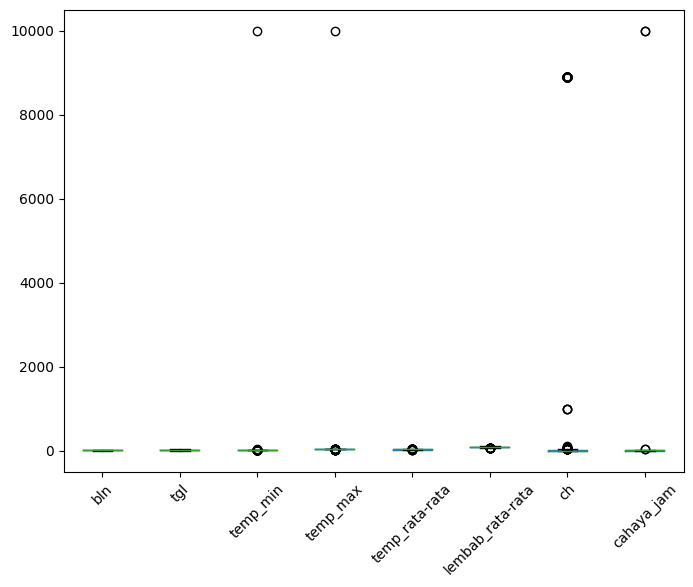

In [384]:
boxplot = df.drop('Thn', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan grafik diatas, terlihat pola persebaran data atau nilai outliers. dapat dilihat pada kolom 'ch' menunjukkan adanya outliers

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "ch" untuk menangani outliers

In [386]:
Q1 = df['ch'].quantile(0.25)
Q3 = df['ch'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['ch']=np.where(df['ch']>upper_whisker,upper_whisker,np.where(df['ch']<lower_whisker,lower_whisker,df['ch']))

#####**Pengecekkan Ulang**

In [387]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Thn,0.000000
bln,0.000000
tgl,0.000000
temp_min,8.484006
temp_max,3.894298
temp_rata-rata,5.285118
lembab_rata-rata,2.920723
ch,0.000000
cahaya_jam,0.556328


Output di atas menunjukkan bahwa nilai-nilai outliers dalam kolom 'ch' telah diubah menjadi 0. Setelah dilakukan pengecekan ulang, tidak ditemukan lagi nilai outliers dalam kolom 'ch'. Kemungkinan hal ini disebabkan oleh proses flooring dan capping yang sebelumnya dilakukan untuk menangani outliers dalam kolom tersebut. Dengan demikian, dapat disimpulkan bahwa kolom 'ch' tidak lagi memiliki nilai outliers setelah proses tersebut diterapkan.

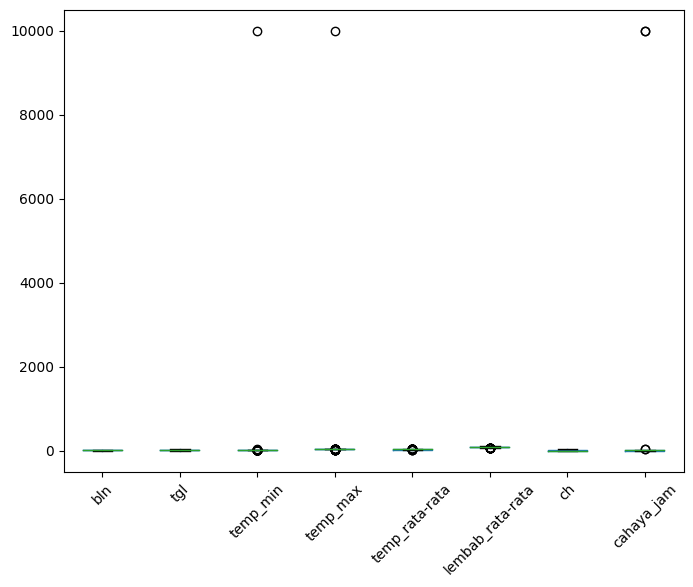

In [388]:
boxplot = df.drop('Thn', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Output di atas mengilustrasikan penyebaran data atau nilai outliers dalam dataset, dengan fokus khusus pada kolom 'ch'. Terlihat bahwa setelah dilakukan penanganan terhadap outliers, penyebaran data telah teratasi dengan baik, terutama pada kolom 'ch'. Grafik menunjukkan bahwa tidak ada lagi nilai yang signifikan jauh dari nilai-nilai lainnya, menunjukkan bahwa tidak ada outliers yang mencolok dalam kolom 'ch'. Ini menunjukkan bahwa proses penanganan outliers, seperti flooring dan capping, berhasil mengatasi nilai-nilai ekstrim dalam kolom 'absences', sehingga distribusi data menjadi lebih merata dan dapat diinterpretasikan dengan lebih baik.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [389]:
# Mengelompokkan nilai curah hujan menjadi kategori rendah, sedang, dan tinggi
bins = [0, 20, 50, float('inf')]
labels = ['rendah', 'sedang', 'tinggi']
df['curah_hujan_kategori'] = pd.cut(df['ch'], bins=bins, labels=labels)

Jadi saya menambahkan fitur kategori curah hujan yang mengambil dari kolom 'ch', jadi kategori ini mengelompokkan curah hujan menjadi rendah, sedang, dan tinggi. yang diharapkan dapat memudahkan kita dalam memahami data.

In [390]:
df.head()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam,curah_hujan_kategori
0,2022,1,1,24.0,32.2,27.0,84.0,1.0,3.5,rendah
1,2022,1,2,24.0,31.2,25.8,91.0,8.1,2.5,rendah
2,2022,1,3,22.4,32.0,26.3,86.0,29.3,2.0,sedang
3,2022,1,4,24.0,29.8,26.7,87.0,0.5,5.5,rendah
4,2022,1,5,23.4,32.2,26.9,85.0,22.3,0.0,sedang


Pada output di atas, terdapat penambahan kolom baru yang disebut "curah_hujan_kategori" di mana setiap entri kategori curah hujan telah ditentukan berdasarkan kolom ch.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [396]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [397]:
df = df.drop(['temp_min','temp_max'], axis=1)

Jadi kode diatas berfungsi untuk mengurangi kolom yang dirasa kurang relevan.

saya mengurangi kolom 'temp_min' dan 'temp_max' karena menurut saya kurang relevan karena sudah memiliki informasi tentang temperatur yang terdapat kolom data 'temp_rata-rata'.

In [398]:
df.head()

,Thn,bln,tgl,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam,curah_hujan_kategori
0,2022,1,1,27.0,84.0,1.0,3.5,rendah
1,2022,1,2,25.8,91.0,8.1,2.5,rendah
2,2022,1,3,26.3,86.0,29.3,2.0,sedang
3,2022,1,4,26.7,87.0,0.5,5.5,rendah
4,2022,1,5,26.9,85.0,22.3,0.0,sedang


Pada output diatas dapat dilihat tidak terdapat kolom 'temp_min' dan 'temp_max' karena sebelumnya saya sudah mengurangi kolom yang kurang relevan

#**Data Transformation**

###**Mapping**

Dikarenakan data saya berupa numerik semua jadi dalam hal ini tidak dapat dilakukan

###**Encoding**

In [399]:
df = pd.get_dummies(df)


Kode tersebut bertujuan untuk mengubah variabel kategorikal dalam DataFrame menjadi bentuk biner. Artinya, setiap nilai kategorikal dalam kolom-kolom tertentu akan menjadi kolom baru dengan nilai biner, yaitu 0 atau 1. Hal ini berguna dalam analisis dan pemodelan data karena membantu dalam mengkodekan informasi kategori ke dalam format yang dapat dimengerti oleh algoritma machine learning.

###**Pengecekkan Hasil**

In [400]:
df.head()

,Thn,bln,tgl,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam,curah_hujan_kategori_rendah,curah_hujan_kategori_sedang,curah_hujan_kategori_tinggi
0,2022,1,1,27.0,84.0,1.0,3.5,1,0,0
1,2022,1,2,25.8,91.0,8.1,2.5,1,0,0
2,2022,1,3,26.3,86.0,29.3,2.0,0,1,0
3,2022,1,4,26.7,87.0,0.5,5.5,1,0,0
4,2022,1,5,26.9,85.0,22.3,0.0,0,1,0


Output diatas merupakan hasil akhir dari dataset saya

In [401]:
df.to_csv('Data Cleaned.csv', index=False)

Kode tersebut bertujuan untuk menyimpan DataFrame df ke dalam file CSV dengan nama 'Data Cleaned.csv'. Parameter index=False digunakan untuk menonaktifkan penulisan indeks DataFrame ke dalam file CSV. Dengan demikian, indeks DataFrame tidak akan disertakan sebagai kolom tambahan di file CSV yang dihasilkan.